In [50]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [51]:
filename = 'fraudTest.csv'

In [52]:
# import Train Dataset
path = '../dataset/midterm_dataset/'+filename
df = pd.read_csv(path)
print(df.shape)
df.head()

(555719, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


<h1> Cleaning part

In [53]:
#select columns
df = df[df.columns[1:]]
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [54]:
# change columns type
df['dob'] = pd.to_datetime(df['dob'])
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  int64         
 2   merchant               555719 non-null  object        
 3   category               555719 non-null  object        
 4   amt                    555719 non-null  float64       
 5   first                  555719 non-null  object        
 6   last                   555719 non-null  object        
 7   gender                 555719 non-null  object        
 8   street                 555719 non-null  object        
 9   city                   555719 non-null  object        
 10  state                  555719 non-null  object        
 11  zip                    555719 non-null  int64         
 12  lat                    555719 non-null  floa

In [55]:
df.gender = df.gender.apply(lambda x: 1 if x == 'M' else 0)
df = df.rename(columns={'gender': 'is_male'})
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,is_male,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,1,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,0,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,0,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,1,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,1,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


<AxesSubplot:>

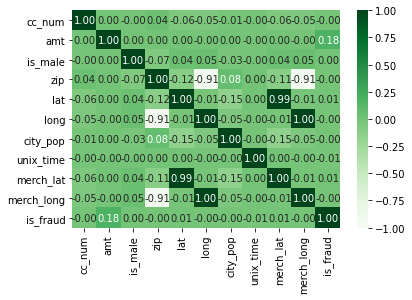

In [56]:
sns.heatmap(df.corr(),cbar=True,annot=True,fmt='.2f', cmap="Greens", vmin=-1, vmax=1)

<AxesSubplot:xlabel='lat', ylabel='long'>

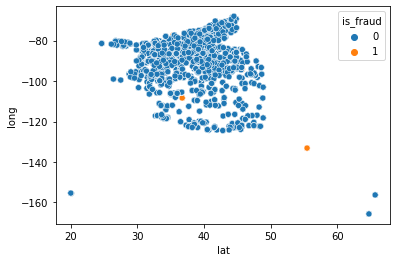

In [57]:
sns.scatterplot(data=df, x="lat", y="long", hue='is_fraud')

In [58]:
#combine columns
if 'state_city' not in df.columns.tolist(): 
    df["state_city"] = df['zip'].astype(str)+', '+df["city"] +', '+df["state"]
if 'full_name' not in df.columns.tolist():
    df['full_name'] = df['first']+' '+df['last']
    

df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,is_male,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,state_city,full_name
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,1,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,"29209, Columbia, SC",Jeff Elliott
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,0,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,"84002, Altonah, UT",Joanne Williams
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,0,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,"11710, Bellmore, NY",Ashley Lopez
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,1,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,"32780, Titusville, FL",Brian Williams
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,1,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,"49632, Falmouth, MI",Nathan Massey


In [59]:
# age when during the trans_date    
if 'age' not in df.columns.tolist():
    df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year

In [60]:
# convert to be range of time
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
if 'trans_time' not in df.columns.tolist():
    df['trans_time'] = pd.cut(df['trans_date_trans_time'].dt.hour, bins=b, labels=l, include_lowest=True)

In [61]:
df['trans_year'] = df['trans_date_trans_time'].dt.year
df['trans_month'] = df['trans_date_trans_time'].dt.month

In [62]:
df['trans_month'].value_counts()

12    139538
8      88759
7      85848
11     72635
9      69533
10     69348
6      30058
Name: trans_month, dtype: int64

In [63]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,is_male,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,state_city,full_name,age,trans_time,trans_year,trans_month
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,1,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,"29209, Columbia, SC",Jeff Elliott,52,Morning,2020,6
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,0,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,"84002, Altonah, UT",Joanne Williams,30,Morning,2020,6
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,0,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,"11710, Bellmore, NY",Ashley Lopez,50,Morning,2020,6
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,1,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,"32780, Titusville, FL",Brian Williams,33,Morning,2020,6
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,1,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,"49632, Falmouth, MI",Nathan Massey,65,Morning,2020,6


In [64]:
#check for each user
df.groupby(['full_name', 'is_fraud']).count()

trans_date_trans_time  cc_num  merchant  category  \
full_name        is_fraud                                                      
Aaron Murray     0                           870     870       870       870   
Aaron Pena       0                           708     708       708       708   
                 1                             7       7         7         7   
Aaron Rogers     0                           233     233       233       233   
Aaron Stewart    0                           200     200       200       200   
...                                          ...     ...       ...       ...   
William Thompson 0                           875     875       875       875   
Willie Jordan    0                           425     425       425       425   
Xavier Beltran   0                           681     681       681       681   
Zachary Allen    0                           673     673       673       673   
Zachary Boone    0                           240     240       240       240   

                           amt  first  last  is_male  street  city  state  \
full_name        is_fraud                                                   
Aaron Murray     0         870    870   870      870     870   870    870   
Aaron Pena       0         708    708   708      708     708   708    708   
                 1           7      7     7        7       7     7      7   
Aaron Rogers     0         233    233   233      233     233   233    233   
Aaron Stewart    0         200    200   200      200     200   200    200   
...                        ...    ...   ...      ...     ...   ...    ...   
William Thompson 0         875    875   875      875     875   875    875   
Willie Jordan    0         425    425   425      425     425   425    425   
Xavier Beltran   0         681    681   681      681     681   681    681   
Zachary Allen    0         673    673   673      673     673   673    673   
Zachary Boone    0         240    240   240      240     240   240    240   

                           zip  lat  long  city_pop  job  dob  trans_num  \
full_name        is_fraud                                                  
Aaron Murray     0         870  870   870       870  870  870        870   
Aaron Pena       0         708  708   708       708  708  708        708   
                 1           7    7     7         7    7    7          7   
Aaron Rogers     0         233  233   233       233  233  233        233   
Aaron Stewart    0         200  200   200       200  200  200        200   
...                        ...  ...   ...       ...  ...  ...        ...   
William Thompson 0         875  875   875       875  875  875        875   
Willie Jordan    0         425  425   425       425  425  425        425   
Xavier Beltran   0         681  681   681       681  681  681        681   
Zachary Allen    0         673  673   673       673  673  673        673   
Zachary Boone    0         240  240   240       240  240  240        240   

                           unix_time  merch_lat  merch_long  state_city  age  \
full_name        is_fraud                                                      
Aaron Murray     0               870        870         870         870  870   
Aaron Pena       0               708        708         708         708  708   
                 1                 7          7           7           7    7   
Aaron Rogers     0               233        233         233         233  233   
Aaron Stewart    0               200        200         200         200  200   
...                              ...        ...         ...         ...  ...   
William Thompson 0               875        875         875         875  875   
Willie Jordan    0               425        425         425         425  425   
Xavier Beltran   0               681        681         681         681  681   
Zachary Allen    0               673        673         673         673  673   
Zachary Boone    0               24

<h3>-delete 'merch_lat', 'merch_long' because the correlation coefficient are almost equal to each others.

<h3>-delete 'full_name'(for checking each users), 'first', 'last' because even there's no any name of each person there'll be other column that can define the siuation in each transaction.

In [65]:
#delete all neccesary columns
del_col = ['cc_num', 'merchant', 'first', 'last', 'street', 'trans_num', 'merch_lat', 'merch_long', 'city', 'state', 'zip','dob', 'full_name','trans_date_trans_time']
for col in del_col:
    if col in df.columns.tolist():
        df = df.drop(col, 1)
df.head()

,category,amt,is_male,lat,long,city_pop,job,unix_time,is_fraud,state_city,age,trans_time,trans_year,trans_month
0,personal_care,2.86,1,33.9659,-80.9355,333497,Mechanical engineer,1371816865,0,"29209, Columbia, SC",52,Morning,2020,6
1,personal_care,29.84,0,40.3207,-110.4360,302,"Sales professional, IT",1371816873,0,"84002, Altonah, UT",30,Morning,2020,6
2,health_fitness,41.28,0,40.6729,-73.5365,34496,"Librarian, public",1371816893,0,"11710, Bellmore, NY",50,Morning,2020,6
3,misc_pos,60.05,1,28.5697,-80.8191,54767,Set designer,1371816915,0,"32780, Titusville, FL",33,Morning,2020,6
4,travel,3.19,1,44.2529,-85.0170,1126,Furniture designer,1371816917,0,"49632, Falmouth, MI",65,Morning,2020,6


In [66]:
df.dtypes

category         object
amt             float64
is_male           int64
lat             float64
long            float64
city_pop          int64
job              object
unix_time         int64
is_fraud          int64
state_city       object
age               int64
trans_time     category
trans_year        int64
trans_month       int64
dtype: object

In [67]:
df.to_csv('../dataset/midterm_dataset/cleaned_'+filename, index=False)

<h1> Normalization

In [68]:
# nor_col = ['amt', 'city_pop','lat', 'long', 'unix_time', 'age']
        
# df[nor_col].apply(lambda x: (x - x.min()) / (x.max() - x.min())).head()

In [69]:
# label = 'is_fraud'
# label

In [70]:
# features = df.loc[:, df.columns != label].columns.tolist()
# print(features)

In [71]:
# y_train = df[label]
# y_train.head()

In [72]:
# X_train = df[features]
# X_train.head()